CHECKPOINT 1 :

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
companies=pd.read_csv('C:\\Users\\user\\Downloads\\companies.txt',sep='\t',encoding="ISO-8859-1")
rounds2=pd.read_csv('C:\\Users\\user\\Downloads\\rounds2.csv',encoding = "ISO-8859-1")

In [90]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [91]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [92]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 3.1+ MB




The companies in rounds2(identified by permalink)-Some are in Capital letters and some are in small letters eventhough they map to the same company 

for ex: /ORGANIZATION/-QOUNTER and /organization/-qounter 

Hence we are converting company_permalink into smaller letters to avoid these issues.

In [93]:
#since some permalinks are in capital letters and some are in small 
rounds2['company_permalink']=rounds2['company_permalink'].str.lower()
rounds2

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0
9,/organization/0xdata,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3000000.0


As we have converted company_permalink in rounds2 into smaller letters, we need to convert permalink column in companies so that when merged with each other wouldn't result in any issue.

In [94]:
companies['permalink']=companies['permalink'].str.lower()#converting permalink into small letters so are to maintain uniqueness between two dataframes
companies

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
5,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN
6,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
7,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
8,/organization/1,One Inc.,http://whatis1.com,Mobile,operating,USA,CA,SF Bay Area,San Francisco,01-08-2011
9,/organization/1-2-3-listo,"1,2,3 Listo",http://www.123listo.com,E-Commerce,operating,CHL,12,Santiago,Las Condes,01-01-2012


2) Answer :

In [95]:
#Since permalink is the unique id of the company
len(companies.groupby('permalink'))

66368

3) Answer :

In [96]:
#Since permalink has non null objects and it is the unique id to represent each company 
#it can be used to represent each column of companies dataframe 
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 2.5+ MB


1) Answer :

In [97]:
#Since company_permalink is the unique id to find out the no. of unique companies 
rounds2.company_permalink.nunique()#different approach of finding unique companies(data in a column)

66370

4) Answer:

Since number of unique companies in companies is less than the number of unique companies in rounds2, it implies that there are additional companies in rounds2 than in companies.

In [98]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


5) Answer:

In [99]:
#Since we need to add companies dataframe to rounds2 we can use outer merge on permalink column present in both the companies
master_frame=pd.merge(companies,rounds2,how="outer",left_on="permalink",right_on="company_permalink")

In [100]:
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [101]:
master_frame.info() #Entries represent the number of columns in master_frame

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114954 entries, 0 to 114953
Data columns (total 16 columns):
permalink                  114947 non-null object
name                       114946 non-null object
homepage_url               108813 non-null object
category_list              111538 non-null object
status                     114947 non-null object
country_code               106271 non-null object
state_code                 104003 non-null object
region                     104782 non-null object
city                       104785 non-null object
founded_at                 94426 non-null object
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(15)
memory usage: 8.3+ MB


CHECKPOINT 2 :

Finding out the average investment for each funding type

1) Answer :

In [102]:
df=master_frame.groupby('funding_round_type')

In [103]:
#Here I can find the average amount invested in the funding types
df.raised_amount_usd.mean()

funding_round_type
angel                    9.586945e+05
convertible_note         1.453439e+06
debt_financing           1.704353e+07
equity_crowdfunding      5.383682e+05
grant                    4.300576e+06
non_equity_assistance    4.112031e+05
post_ipo_debt            1.687046e+08
post_ipo_equity          8.218249e+07
private_equity           7.330859e+07
product_crowdfunding     1.363131e+06
secondary_market         7.964963e+07
seed                     7.198180e+05
undisclosed              1.924237e+07
venture                  1.174895e+07
Name: raised_amount_usd, dtype: float64

2) Answer :

In [104]:
##venture is the only type which can be invested with the required criteria
(df.raised_amount_usd.mean()<15000000) & (df.raised_amount_usd.mean()>5000000)

funding_round_type
angel                    False
convertible_note         False
debt_financing           False
equity_crowdfunding      False
grant                    False
non_equity_assistance    False
post_ipo_debt            False
post_ipo_equity          False
private_equity           False
product_crowdfunding     False
secondary_market         False
seed                     False
undisclosed              False
venture                   True
Name: raised_amount_usd, dtype: bool

In [105]:
master_frame=master_frame[master_frame.funding_round_type=='venture']

In [106]:
master_frame #Now only venture rounding_type is present

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
5,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN
8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0
10,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0
11,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0
12,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0
22,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.0


CHECKPOINT 3 :

In [107]:
df1=master_frame.groupby('country_code').raised_amount_usd.sum().sort_values(ascending=False)

In [108]:
df1

country_code
USA    4.225108e+11
CHN    3.983542e+10
GBR    2.024563e+10
IND    1.439186e+10
CAN    9.583332e+09
FRA    7.259537e+09
ISR    6.907515e+09
DEU    6.346960e+09
JPN    3.363677e+09
SWE    3.254953e+09
NLD    2.939404e+09
CHE    2.827560e+09
SGP    2.793918e+09
ESP    1.835831e+09
BRA    1.785987e+09
IRL    1.676131e+09
RUS    1.570426e+09
AUS    1.322935e+09
DNK    1.228311e+09
BEL    1.070542e+09
FIN    1.043200e+09
NOR    9.561924e+08
KOR    9.399883e+08
MYS    8.830588e+08
HKG    7.812670e+08
AUT    6.309550e+08
TWN    6.239795e+08
TUR    5.590975e+08
ITA    4.882894e+08
NZL    4.483164e+08
           ...     
GRC    1.074378e+07
BAH    8.900000e+06
TTO    8.500000e+06
SVK    8.241062e+06
BGD    7.002000e+06
LBN    6.455000e+06
GGY    3.960000e+06
TUN    3.920000e+06
SEN    2.860000e+06
HRV    2.633669e+06
UGA    2.500000e+06
PER    2.469270e+06
BWA    2.250000e+06
PAN    2.100000e+06
LAO    2.100000e+06
MAR    1.600000e+06
MUS    1.500000e+06
PRI    1.441901e+06
ECU    

In [109]:
top9=df1[:9]
top9=top9.reset_index()

In [110]:
top9

,country_code,raised_amount_usd
0,USA,4.225108e+11
1,CHN,3.983542e+10
2,GBR,2.024563e+10
3,IND,1.439186e+10
4,CAN,9.583332e+09
5,FRA,7.259537e+09
6,ISR,6.907515e+09
7,DEU,6.346960e+09
8,JPN,3.363677e+09





Since the top three english speaking countries are USA, GBR and IND 

The remaining countries can be removed from the dataframe

In [111]:
master_frame=master_frame[(master_frame.country_code=='USA') | (master_frame.country_code=='GBR') | (master_frame.country_code=='IND')]
master_frame #Now only countries with USA,GBR and IND are present in the dataframe

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
5,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN
10,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0
11,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0
12,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0
22,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.0
28,/organization/10-minutes-with,10 Minutes With,http://10minuteswith.com,Education,operating,GBR,H9,London,London,01-01-2013,/organization/10-minutes-with,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,A,09-10-2014,4000000.0
33,/organization/1000lookz,1000Lookz,http://1000lookz.com,Beauty,operating,IND,25,Chennai,Chennai,01-01-2008,/organization/1000lookz,/funding-round/e07f6e580046d00c7aeb33fafb9d90a3,venture,NaN,22-07-2013,NaN
34,/organization/1000memories,1000memories,http://1000memories.com,Curated Web,acquired,USA,CA,SF Bay Area,San Francisco,01-07-2010,/organization/1000memories,/funding-round/502bd0e50c27616995e4bdad24605ef8,venture,A,16-02-2011,2520000.0


CHECKPOINT 4:

1) Answer :

In [112]:
#Primary sector is found using the function cat() and each of the primary sector is inserted at a separate column
master_frame['category_list']=master_frame['category_list'].astype(str)
def cat(x):
    l=x['category_list'].split('|')
    return l[0]

master_frame['primary_sector']=master_frame.apply(cat,axis=1) 
master_frame 

c:\python\python36-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\python\python36-32\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,Media
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,Application Platforms
5,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN,Software
10,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,Analytics
11,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0,Analytics
12,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0,Analytics
22,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.0,Apps
28,/organization/10-minutes-with,10 Minutes With,http://10minuteswith.com,Education,operating,GBR,H9,London,London,01-01-2013,/organization/10-minutes-with,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,A,09-10-2014,4000000.0,Education
33,/organization/1000lookz,1000Lookz,http://1000lookz.com,Beauty,operating,IND,25,Chennai,Chennai,01-01-2008,/organization/1000lookz,/funding-round/e07f6e580046d00c7aeb33fafb9d90a3,venture,NaN,22-07-2013,NaN,Beauty
34,/organization/1000memories,1000memories,http://1000memories.com,Curated Web,acquired,USA,CA,SF Bay Area,San Francisco,01-07-2010,/organization/1000memories,/funding-round/502bd0e50c27616995e4bdad24605ef8,venture,A,16-02-2011,2520000.0,Curated Web


2) Answer :

In [113]:
mapping=pd.read_csv('C:\\Users\\user\\Downloads\\mapping.csv',encoding = "ISO-8859-1")
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [114]:
#main sector is found using primary sector using sect function and is stored in the mapping dataframe
def sect(x):
     if(x['Automotive & Sports'] ==1):
             return 'Automotive & Sports'
     if(x['Cleantech / Semiconductors']==1):
             return 'Cleantech / Semiconductors'
     if(x['Entertainment']==1):
             return 'Entertainment'
     if(x['Health']==1):
             return 'Health'
     if(x['Manufacturing']==1):
             return 'Manufactoring'
     if(x['News, Search and Messaging']==1):
             return 'News, Search and Messaging'
     if(x['Others']==1):
             return 'Others'
     if(x['Social, Finance, Analytics, Advertising']==1):
             return 'Social, Finance, Analytics, Advertising'
     

In [115]:
mapping['main_sector']=mapping.apply(sect,axis=1)

In [116]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising",main_sector
0,NaN,0,1,0,0,0,0,0,0,0,None
1,3D,0,0,0,0,0,1,0,0,0,Manufactoring
2,3D Printing,0,0,0,0,0,1,0,0,0,Manufactoring
3,3D Technology,0,0,0,0,0,1,0,0,0,Manufactoring
4,Accounting,0,0,0,0,0,0,0,0,1,"Social, Finance, Analytics, Advertising"


In [117]:
map_sector=mapping[['category_list','main_sector']]
map_sector

,category_list,main_sector
0,NaN,None
1,3D,Manufactoring
2,3D Printing,Manufactoring
3,3D Technology,Manufactoring
4,Accounting,"Social, Finance, Analytics, Advertising"
5,Active Lifestyle,Health
6,Ad Targeting,"Social, Finance, Analytics, Advertising"
7,Advanced Materials,Manufactoring
8,Adventure Travel,Automotive & Sports
9,Advertising,"Social, Finance, Analytics, Advertising"


In [118]:
master_frame.head() #Before inserting primary sector column into the dataframe

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,Media
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,Application Platforms
5,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN,Software
10,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,Analytics
11,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0,Analytics


In [119]:
master_frame=pd.merge(master_frame,map_sector,how='inner',left_on='primary_sector',right_on='category_list')
df=master_frame # df is used during plotting
master_frame

,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,category_list_y,main_sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,Media,Media,Entertainment
1,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,Media,Media,Entertainment
2,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,Media,Media,Entertainment
3,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NaN,26-03-2014,18000000.0,Media,Media,Entertainment
4,/organization/all-def-digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0,Media,Media,Entertainment
5,/organization/audiosocket,Audiosocket,http://audiosocket.com,Media|Music|Technology,operating,USA,WA,Seattle,Seattle,01-05-2008,/organization/audiosocket,/funding-round/0959f59e3a89bc8db8c6ed9c646349fd,venture,NaN,02-05-2013,650000.0,Media,Media,Entertainment
6,/organization/audiosocket,Audiosocket,http://audiosocket.com,Media|Music|Technology,operating,USA,WA,Seattle,Seattle,01-05-2008,/organization/audiosocket,/funding-round/4e3a53eec6c609943df752206070b23f,venture,A,02-09-2009,750000.0,Media,Media,Entertainment
7,/organization/audiosocket,Audiosocket,http://audiosocket.com,Media|Music|Technology,operating,USA,WA,Seattle,Seattle,01-05-2008,/organization/audiosocket,/funding-round/bc0b412cf2fa7b739e4105ad756b47a4,venture,NaN,15-02-2012,1582300.0,Media,Media,Entertainment
8,/organization/babble,Babble,http://www.babble.com,Media|News|Parenting,acquired,USA,NY,New York City,New York,01-12-2006,/organization/babble,/funding-round/43cc678b39be3e684bb88501af05ff9b,venture,A,05-02-2009,2000000.0,Media,Media,Entertainment
9,/organization/babble,Babble,http://www.babble.com,Media|News|Parenting,acquired,USA,NY,New York City,New York,01-12-2006,/organization/babble,/funding-round/5fdb3dbeeb6eea0243702adc372130f3,venture,A,12-05-2009,1250000.0,Media,Media,Entertainment


In [120]:
del master_frame['category_list_y']


In [121]:
master_frame.head()

,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,Media,Entertainment
1,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,Media,Entertainment
2,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,Media,Entertainment
3,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NaN,26-03-2014,18000000.0,Media,Entertainment
4,/organization/all-def-digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0,Media,Entertainment


CHECKPOINT 5:

Creating three dataframes

In [122]:
D1=master_frame[master_frame['country_code']=='USA']
D1.head()

,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector
4,/organization/all-def-digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0,Media,Entertainment
5,/organization/audiosocket,Audiosocket,http://audiosocket.com,Media|Music|Technology,operating,USA,WA,Seattle,Seattle,01-05-2008,/organization/audiosocket,/funding-round/0959f59e3a89bc8db8c6ed9c646349fd,venture,NaN,02-05-2013,650000.0,Media,Entertainment
6,/organization/audiosocket,Audiosocket,http://audiosocket.com,Media|Music|Technology,operating,USA,WA,Seattle,Seattle,01-05-2008,/organization/audiosocket,/funding-round/4e3a53eec6c609943df752206070b23f,venture,A,02-09-2009,750000.0,Media,Entertainment
7,/organization/audiosocket,Audiosocket,http://audiosocket.com,Media|Music|Technology,operating,USA,WA,Seattle,Seattle,01-05-2008,/organization/audiosocket,/funding-round/bc0b412cf2fa7b739e4105ad756b47a4,venture,NaN,15-02-2012,1582300.0,Media,Entertainment
8,/organization/babble,Babble,http://www.babble.com,Media|News|Parenting,acquired,USA,NY,New York City,New York,01-12-2006,/organization/babble,/funding-round/43cc678b39be3e684bb88501af05ff9b,venture,A,05-02-2009,2000000.0,Media,Entertainment


In [123]:
D2=master_frame[master_frame['country_code']=='GBR']
D2.head()

,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector
1,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,Media,Entertainment
2,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,Media,Entertainment
3,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NaN,26-03-2014,18000000.0,Media,Entertainment
42,/organization/teepix,Teepix,NaN,Media|Photography|Service Providers,operating,GBR,A5,London,Bedford,NaN,/organization/teepix,/funding-round/71b43b36b581697e603b256a13229994,venture,NaN,14-11-2007,1655405.0,Media,Entertainment
63,/organization/common-interest-communities,Common Interest Communities,http://commoninterestcommunities.com/,Application Platforms|Internet|Software|Startups,operating,GBR,H9,London,London,NaN,/organization/common-interest-communities,/funding-round/8195587cbd5e51af7514ee92ef4ba6ba,venture,NaN,09-07-2014,10000000.0,Application Platforms,"News, Search and Messaging"


In [124]:
D3=master_frame[master_frame['country_code']=='IND']
D3.head()

,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,Media,Entertainment
23,/organization/manas-informatics,Manas Informatic,http://www.topnews.in,Media|News,operating,IND,23,Mohali,Mohali,05-05-2007,/organization/manas-informatics,/funding-round/719e50301803d3918ffa558fc877e41c,venture,NaN,02-02-2008,160000.0,Media,Entertainment
244,/organization/ameyo,Ameyo,http://www.ameyo.com/,Software,operating,IND,10,New Delhi,Gurgaon,01-01-2003,/organization/ameyo,/funding-round/81b50a403d5d2293715fe9b0ce4db5d3,venture,A,03-07-2015,5000000.0,Software,Others
272,/organization/appdra,Appdra,http://appdra.com/,Software,operating,IND,19,Bangalore,Bangalore,01-01-2013,/organization/appdra,/funding-round/5b371e7c04e44c2bc57fda38cd680d8a,venture,A,22-07-2014,1500000.0,Software,Others
274,/organization/applabs,AppLabs,http://www.applabs.com,Software,acquired,IND,2,Hyderabad,Hyderabad,01-01-2001,/organization/applabs,/funding-round/29152fc812013ef482c93f6dd47f58ff,venture,NaN,29-06-2006,10000000.0,Software,Others


1) Answer :

In [125]:
D1.permalink.count()

35421

In [126]:
D2.permalink.count()

2120

In [127]:
D3.permalink.count()

890

2) Answer :

In [128]:
D1.raised_amount_usd.sum()

392237581395.0

In [129]:
D2.raised_amount_usd.sum()

18924390319.0

In [130]:
D3.raised_amount_usd.sum()

13537981235.0

3,4,5,6,,7,8 Answers:

In [131]:
D1.groupby('main_sector')['permalink'].count().sort_values(ascending=False)

main_sector
Others                                     8693
Cleantech / Semiconductors                 8113
Social, Finance, Analytics, Advertising    5553
News, Search and Messaging                 4562
Health                                     3403
Manufactoring                              2643
Entertainment                              1888
Automotive & Sports                         566
Name: permalink, dtype: int64

In [132]:
D2.groupby('main_sector')['permalink'].count().sort_values(ascending=False)

main_sector
Others                                     571
Cleantech / Semiconductors                 456
Social, Finance, Analytics, Advertising    359
News, Search and Messaging                 265
Entertainment                              157
Manufactoring                              132
Health                                     126
Automotive & Sports                         54
Name: permalink, dtype: int64

In [133]:
D3.groupby('main_sector')['permalink'].count().sort_values(ascending=False)

main_sector
Others                                     329
News, Search and Messaging                 154
Social, Finance, Analytics, Advertising    104
Entertainment                               88
Manufactoring                               64
Cleantech / Semiconductors                  63
Health                                      56
Automotive & Sports                         32
Name: permalink, dtype: int64

9) Answer :

In [134]:
D1[D1['main_sector']=='Others'].groupby('name').raised_amount_usd.sum().sort_values(ascending=False)

name
SoFi                            1.365200e+09
Snapchat                        1.165100e+09
LivingSocial                    8.182250e+08
Facebook                        6.152000e+08
Zenefits                        5.815000e+08
CoreExpress                     5.730000e+08
Jet                             5.450000e+08
Pure Storage                    4.700000e+08
Social Finance                  3.980000e+08
Wayfair                         3.580000e+08
Opnext                          3.210000e+08
Nutanix                         3.122000e+08
Mozido                          3.071618e+08
Tanium                          3.023125e+08
Tenable Network Security        3.000000e+08
lynda.com                       2.890000e+08
CarsDirect.com                  2.800000e+08
Instacart                       2.725000e+08
Tintri                          2.600000e+08
Force10 Networks                2.550678e+08
MuleSoft                        2.550000e+08
SurveyMonkey                    2.500000e+08
JustF

In [135]:
D2[D2['main_sector']=='Others'].groupby('name').raised_amount_usd.sum().sort_values(ascending=False)

name
OneWeb                                 500000000.0
Farfetch                               194500000.0
Liquid Telecom                         150000000.0
picoChip                               111500000.0
NewVoiceMedia                          111300000.0
Six Degrees Group                      106392886.0
MyOptique Group                        102232479.0
onefinestay                             80900000.0
SilverRail Technologies                 69000000.0
Xplornet                                65000000.0
Lyst                                    59000000.0
Cambridge Broadband Networks            55500000.0
EZBOB                                   53982075.0
WorldStores                             53684629.0
Seatwave                                53000000.0
OrderDynamics                           51410000.0
Cambridge Quantum Computing Limited     50000000.0
Avecto                                  49000000.0
EVIIVO                                  48919968.0
Picsel Technologies       

In [136]:
D3[D3['main_sector']=='Others'].groupby('name').raised_amount_usd.sum().sort_values(ascending=False)

name
Flipkart                       2.451000e+09
Snapdeal                       3.107000e+08
Tata Teleservices              2.120000e+08
Myntra                         1.587500e+08
Pepperfry.com                  1.280000e+08
Delhivery                      1.275000e+08
OYO Rooms                      1.250000e+08
Naaptol                        1.062000e+08
iGATE/Patni Computers          1.000000e+08
Bigbasket.com                  8.580000e+07
TutorVista.com                 8.375000e+07
CESC                           8.000000e+07
Urban Ladder                   7.700000e+07
FirstCry.com                   6.500000e+07
GirnarSoft                     6.500000e+07
CommonFloor                    6.290000e+07
Tejas Networks India           5.900000e+07
Fashion & You                  5.800000e+07
Financial Software Systems     5.700000e+07
Craftsvilla                    5.450000e+07
Ariisto                        5.400000e+07
CaratLane                      5.200000e+07
Little                     

10) Answer :

In [137]:
D1[D1['main_sector']=='Cleantech / Semiconductors'].groupby('name').raised_amount_usd.sum().sort_values(ascending=False)

name
Freescale Semiconductor               1.760000e+10
Juno Therapeutics                     1.159803e+09
Better Place                          7.750000e+08
BrightSource Energy                   5.820000e+08
GreatPoint Energy                     5.620000e+08
Tenaska                               5.500000e+08
Stem CentRx                           4.735270e+08
Invenergy                             4.590000e+08
MiaSolÃ©                              4.164000e+08
QuantRx Biomedical                    4.060397e+08
Nanosolar                             4.000000e+08
Webvan                                4.000000e+08
Adaptive Biotechnologies              3.989995e+08
Ikaria                                3.449472e+08
NGM Biopharmaceuticals                3.339890e+08
Intarcia Therapeutics                 3.315146e+08
Kosmos Biotherapeutics                3.190000e+08
Kosmos Energy Ltd.                    3.000000e+08
Elevance Renewable Sciences           2.940000e+08
Amyris Biotechnologies    

In [138]:
D2[D2['main_sector']=='Cleantech / Semiconductors'].groupby('name').raised_amount_usd.sum().sort_values(ascending=False)

name
Immunocore                             320000000.0
ReNeuron Group                         150859892.0
Circassia                              144630999.0
BioVex                                 133314585.0
Kymab                                  120400000.0
Oxford Immunotec                       106550010.0
Adaptimmune                            104000000.0
Intelligent Energy                     103570000.0
Archimedes Pharma                       99000000.0
Proximagen                              96500000.0
SAGE Therapeutics                       93000000.0
Cell Medica                             89412191.0
CRISPR THERAPEUTICS                     89000000.0
Green Biologics                         81218061.0
Chroma Therapeutics                     77500000.0
Atlas Genetics                          75583454.0
Syntaxin                                71390000.0
NuCana BioMed                           67529448.0
Spinifex Pharmaceuticals                64000000.0
ESBATech                  

In [139]:
D3[D3['main_sector']=='News, Search and Messaging'].groupby('name').raised_amount_usd.sum().sort_values(ascending=False)

name
Quikr                            346000000.0
FreeCharge                       113000000.0
Micromax Informatics              88000000.0
hike                              86000000.0
IndiaHomes                        75776000.0
Just Dial                         67000000.0
NewsHunt                          58000000.0
Ramco Systems                     52000000.0
PepperTap                         46000000.0
Getit InfoServices                36400000.0
One97 Communications              35000000.0
Ezetap                            35000000.0
UrbanClap                         35000000.0
GupShup                           33000000.0
Bluestone.com                     30800000.0
MobiKwik                          30000000.0
TinyOwl Technology                27665775.0
IMImobile                         26000000.0
Inshorts                          24000000.0
Knowlarity Communications         22500000.0
BTI Payments                      22400000.0
SMS GupShup                       22000000.0
nivio


CHECKPOINT 6 :


1) Answer :

In [140]:
mf=pd.merge(companies,rounds2,how="outer",left_on="permalink",right_on="company_permalink")

In [141]:
dataf=mf[(mf.funding_round_type=='venture')|(mf.funding_round_type=='private_equity')|(mf.funding_round_type=='seed')]
dataf.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [142]:
total=dataf.raised_amount_usd.sum()

Text(0.5,1,'Average Sales')

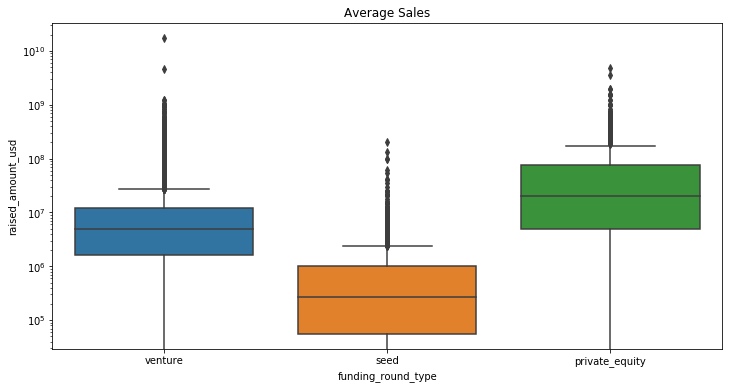

In [143]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='funding_round_type', y='raised_amount_usd',data=dataf)
plt.yscale('log')
plt.title("Average Sales")

2) Answer :

In [144]:
top9

,country_code,raised_amount_usd
0,USA,4.225108e+11
1,CHN,3.983542e+10
2,GBR,2.024563e+10
3,IND,1.439186e+10
4,CAN,9.583332e+09
5,FRA,7.259537e+09
6,ISR,6.907515e+09
7,DEU,6.346960e+09
8,JPN,3.363677e+09


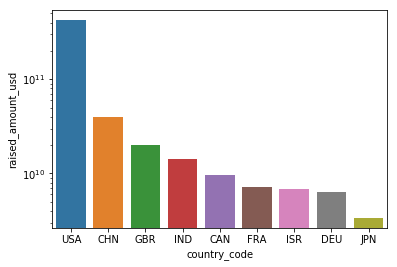

In [145]:
sns.barplot(x='country_code', y='raised_amount_usd', data=top9)
plt.yscale('log')
plt.show()

3) Answer :

In [146]:
df1=df[(df.country_code=='USA')&((df.main_sector=='Others')|(df.main_sector=='Cleantech / Semiconductors')|(df.main_sector=='Social, Finance, Analytics, Advertising'))]

In [147]:
df2=df[(df.country_code=='GBR')&((df.main_sector=='Others')|(df.main_sector=='Cleantech / Semiconductors')|(df.main_sector=='Social, Finance, Analytics, Advertising'))]

In [148]:
df3=df[(df.country_code=='IND')&((df.main_sector=='Others')|(df.main_sector=='News, Search and Messaging')|(df.main_sector=='Social, Finance, Analytics, Advertising'))]

In [149]:
df4=pd.concat([df1,df2,df3])

In [150]:
df4

,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector
112,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN,Software,Others
113,/organization/1010data,1010data,http://www.1010data.com,Software,acquired,USA,NY,New York City,New York,01-01-2000,/organization/1010data,/funding-round/482fbf992b48f5c47d0080ab7ec0cb54,venture,NaN,08-03-2010,35000000.0,Software,Others
114,/organization/16-mile-solutions,16 Mile Solutions,NaN,Software,operating,USA,WA,Seattle,Seattle,01-01-2006,/organization/16-mile-solutions,/funding-round/3a671cf6f08fe5d0a878f5627134384c,venture,NaN,11-06-2009,199957.0,Software,Others
115,/organization/170-systems,170 Systems,http://www.170systems.com,Software,acquired,USA,MA,Boston,Bedford,01-01-1990,/organization/170-systems,/funding-round/b84bb882ca873f5fb96535671981196d,venture,A,16-04-2002,14000000.0,Software,Others
116,/organization/1energy-systems,1Energy Systems,http://1energysystems.com,Software,operating,USA,WA,Seattle,Seattle,01-01-2010,/organization/1energy-systems,/funding-round/0502de190cb6fd03ba9435767080bcdb,venture,NaN,22-04-2013,1450000.0,Software,Others
117,/organization/38-zeros,38 Zeros,http://www.38zeros.com/,Software,operating,USA,OR,"Portland, Oregon",Portland,NaN,/organization/38-zeros,/funding-round/d59b46682e47e89673c218a36f290b81,venture,NaN,11-03-2015,800000.0,Software,Others
118,/organization/3d-sports-technology,3D Sports Technology,http://3dsportstech.com,Software,operating,USA,MN,Minneapolis,Minneapolis,01-01-2010,/organization/3d-sports-technology,/funding-round/8edeef5a343fd5fa6bd47dc317d92354,venture,NaN,21-01-2011,505000.0,Software,Others
119,/organization/3d-sports-technology,3D Sports Technology,http://3dsportstech.com,Software,operating,USA,MN,Minneapolis,Minneapolis,01-01-2010,/organization/3d-sports-technology,/funding-round/ac7a75f6b8b83d48056ecdf8efb0e872,venture,NaN,07-06-2012,110000.0,Software,Others
120,/organization/3d-sports-technology,3D Sports Technology,http://3dsportstech.com,Software,operating,USA,MN,Minneapolis,Minneapolis,01-01-2010,/organization/3d-sports-technology,/funding-round/e4cc7f5519c4556d7ee84c1b14d3a3ae,venture,NaN,25-07-2013,294940.0,Software,Others
121,/organization/3d-systems,3D Systems,http://www.3dsystems.com,Software,ipo,USA,SC,SC - Other,Rock Hill,01-01-1986,/organization/3d-systems,/funding-round/fa1d366d6517e4ca57a61dffce914067,venture,NaN,16-04-2014,17500000.0,Software,Others


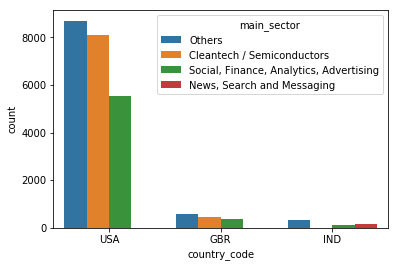

In [151]:
sns.countplot(x="country_code", hue="main_sector", data=df4)